<a href="https://colab.research.google.com/github/ranjita782/python-projects/blob/main/Insights_ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the Business Context**

a. Ola's Objectives in Evaluating Drivers:

**Reward Top Performers:**
Identify and incentivize high-performing drivers to retain them and keep them motivated. This could include bonuses, recognition, or better routes.
Pinpoint drivers who are underperforming and create action plans for improvement. This may involve training, feedback, or support systems.

**Improve Customer Satisfaction:**
Ensure that drivers provide a good user experience by focusing on factors like timely rides, driver behavior, and ride quality, which directly impact customer retention and loyalty.

b. Challenges Faced by Drivers and Factors Affecting Performance:

**Income Stability:**

Fluctuating income due to demand variations, ride cancellations, or payment issues can cause dissatisfaction among drivers, potentially leading to churn.

**Workload and Hours:**

Drivers often face long working hours or inconsistent shifts, which can affect both performance and satisfaction.

Performance Metrics:

Ratings, complaints, and customer feedback are key performance indicators for drivers. Negative reviews or low ratings can reduce opportunities and create stress.

**Competition and Incentives:**

Competitive pressure from other ride-hailing services and insufficient incentives for drivers could lead to dissatisfaction and churn.
By aligning its evaluation process with these business objectives and challenges, Ola can develop a strategy that supports driver retention, rewards top performers, and improves the overall customer experience.

**Interpreting Model Coefficients for Ola's Driver Performance:**

**a. Analyze the Coefficients:**

Magnitude of Coefficients:

Higher coefficients indicate features that have a stronger influence on the model’s predictions (i.e., performance or churn). Features with the highest absolute values are the most important drivers of performance.
For example, if the “Total Business Value” has a high coefficient, it suggests that drivers generating more business are likely performing well and less likely to churn.

b. Relationship Direction:
Positive Coefficients:

A positive coefficient means that as the feature increases, it has a positive impact on the outcome. For instance, if "Quarterly Rating" has a positive coefficient, then higher ratings are associated with better performance or reduced churn.

Negative Coefficients:

A negative coefficient suggests that as the feature increases, it has a negative effect on the outcome. For example, if "Declining Income" has a negative coefficient, it indicates that drivers with declining income are more likely to underperform or leave.
Example:
If the coefficient for "Education Level" is positive, it means that drivers with a higher education level may perform better or be less likely to churn.
Conversely, if "Declining Quarterly Rating" has a negative coefficient, it shows that drivers whose ratings are falling are at higher risk of leaving or underperforming.
Key Takeaways:
High coefficients show important areas for Ola to focus on, such as increasing business value or improving ratings.
Positive or negative relationships help Ola understand how changes in specific features (e.g., income, rating, education level) impact driver performance, guiding strategic decisions on training, rewards, and retention programs.

In [ ]:
# Grouping by Education Level and calculating average Quarterly Rating
df=pd.read_csv('ola.csv')
education_ratings = df.groupby('Education_Level')['Quarterly Rating'].mean().reset_index()

# Displaying the aggregated data
print(education_ratings)


   Education_Level  Quarterly Rating
0                0          1.951801
1                1          2.048660
2                2          2.019124


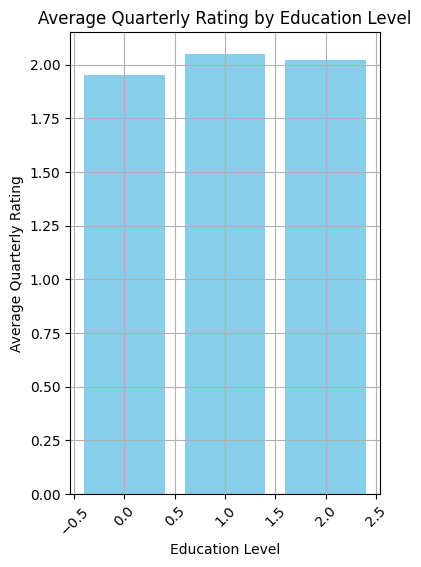

In [ ]:
# Plot the average rating by education level
plt.figure(figsize=(4, 6))
plt.bar(education_ratings['Education_Level'], education_ratings['Quarterly Rating'], color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Quarterly Rating')
plt.title('Average Quarterly Rating by Education Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


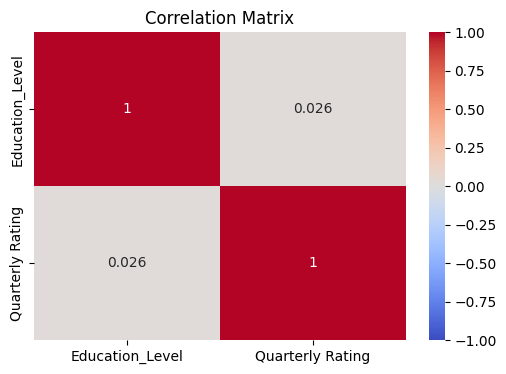

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['Education_Level','Quarterly Rating']].corr()

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Education Level has a weak positive correlation (~0.03) with Quarterly Rating (a measure of driver performance). Drivers with more education aren't necessarily performing significantly better or worse than drivers with less education.

In [ ]:
# Filter drivers who have Quarterly Rating and Grade >= 4
top_drivers = df[(df['Quarterly Rating'] >= 4) & (df['Grade'] >= 4)]

# Number of top drivers
top_drivers_count = top_drivers.shape[0]
print(f"Number of top drivers (Quarterly Rating and Grade >= 4): {top_drivers_count}")


Number of top drivers (Quarterly Rating and Grade >= 4): 189


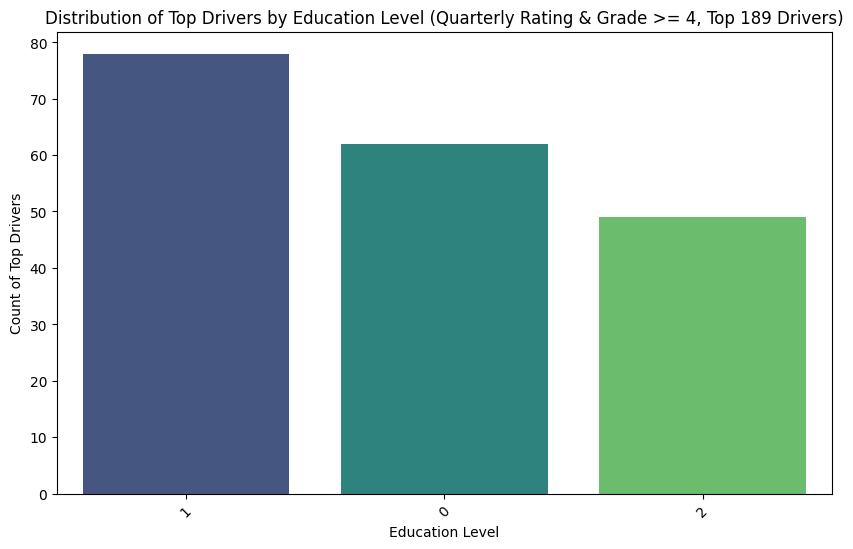

In [ ]:
# Plot distribution of top drivers by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=top_drivers, x='Education_Level', order=top_drivers['Education_Level'].value_counts().index, palette='viridis')
plt.title(f'Distribution of Top Drivers by Education Level (Quarterly Rating & Grade >= 4, Top {top_drivers_count} Drivers)')
plt.xlabel('Education Level')
plt.ylabel('Count of Top Drivers')
plt.xticks(rotation=45)
plt.show()


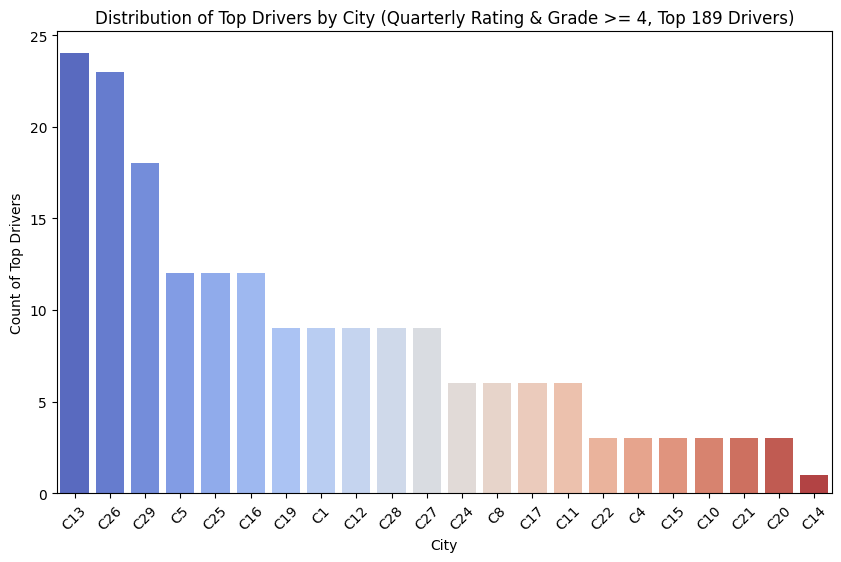

In [ ]:
# Plot distribution of top drivers by city
plt.figure(figsize=(10, 6))
sns.countplot(data=top_drivers, x='City', order=top_drivers['City'].value_counts().index, palette='coolwarm')
plt.title(f'Distribution of Top Drivers by City (Quarterly Rating & Grade >= 4, Top {top_drivers_count} Drivers)')
plt.xlabel('City')
plt.ylabel('Count of Top Drivers')
plt.xticks(rotation=45)
plt.show()


 Here we filter the top drivers based on both Quarterly Rating and Grade (both >= 4).The plots show how these top drivers are distributed across Education Level, City, and Grade.

In [ ]:
ola_df = pd.read_csv('ola.csv')
newola_df = pd.read_csv('newola.csv')
merged_df = pd.merge(ola_df, newola_df[['Driver_ID', 'Final_Churn_Prediction']], on='Driver_ID', how='left')
merged_df.to_csv('ola_with_target.csv', index=False)

In [ ]:
city_metrics = merged_df.groupby('City').agg({
    'Income': 'mean',
    'Total Business Value': 'mean',
    'Final_Churn_Prediction': 'mean'  # assuming Final_Churn_Prediction is your churn indicator
}).reset_index()


In [ ]:
city_metrics

,City,Income,Total Business Value,Final_Churn_Prediction
0,C1,65043.239291,531560.280650,0.374251
1,C10,66081.630376,540753.736559,0.301389
2,C11,69408.235043,538549.145299,0.224444
3,C12,71676.976616,667282.310867,0.331897
4,C13,62173.028120,796263.075571,0.402214
5,C14,64680.240741,607931.635802,0.414219
6,C15,66167.884363,553266.636005,0.444596
7,C16,63141.394922,632585.712271,0.445783
8,C17,56845.652273,429160.204545,0.288636
9,C18,73213.165441,550106.250000,0.414538


City C6 has an average income of 64,062.13 and a churn prediction of 0.514. This means that drivers in City C6 have a relatively high predicted likelihood of churning, compared to other cities in the dataset.

In [ ]:
!gdown 194oiYUx917jxPLvqnFPtPDi3n09Ullkj

Downloading...
From: https://drive.google.com/uc?id=194oiYUx917jxPLvqnFPtPDi3n09Ullkj
To: /content/ola.csv
100% 1.13M/1.13M [00:00<00:00, 30.9MB/s]


In [ ]:
# Header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2,chi2_contingency,f_oneway,kruskal,shapiro
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
# Import the dataset
df=pd.read_csv('ola.csv')


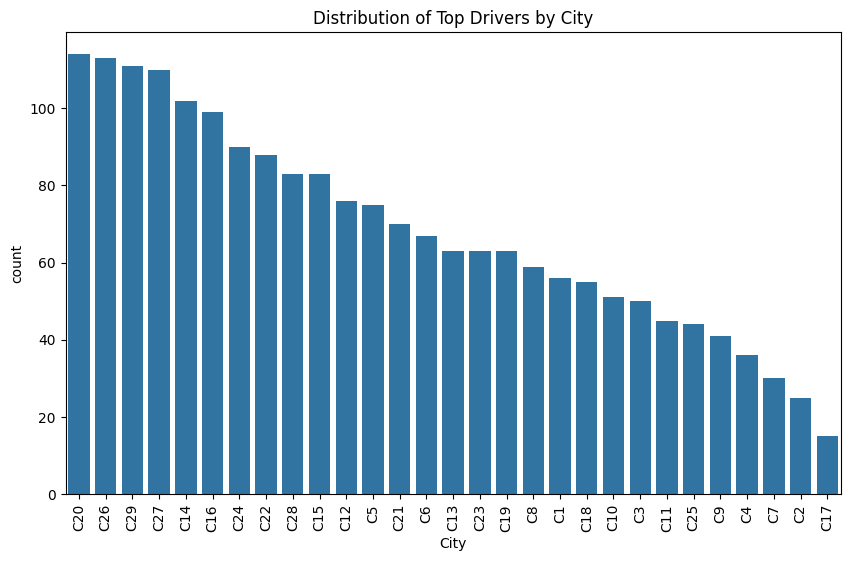

In [ ]:
# Distribution by City
import seaborn as sns
import matplotlib.pyplot as plt
threshold =3.5
# Filter top drivers (assuming top drivers have a rating above a certain threshold)
top_drivers = df[df['Quarterly Rating'] > threshold]
# Plot the distribution of top drivers by city
plt.figure(figsize=(10,6))
sns.countplot(data=top_drivers, x='City', order=top_drivers['City'].value_counts().index)
plt.title('Distribution of Top Drivers by City')
plt.xticks(rotation=90)
plt.show()


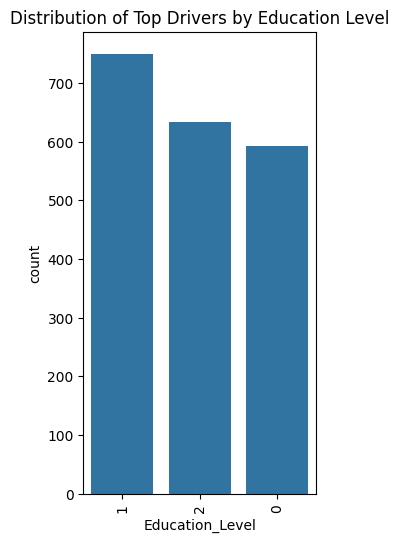

In [ ]:
# Plot the distribution of top drivers by education level
plt.figure(figsize=(3,6))
sns.countplot(data=top_drivers, x='Education_Level', order=top_drivers['Education_Level'].value_counts().index)
plt.title('Distribution of Top Drivers by Education Level')
plt.xticks(rotation=90)
plt.show()


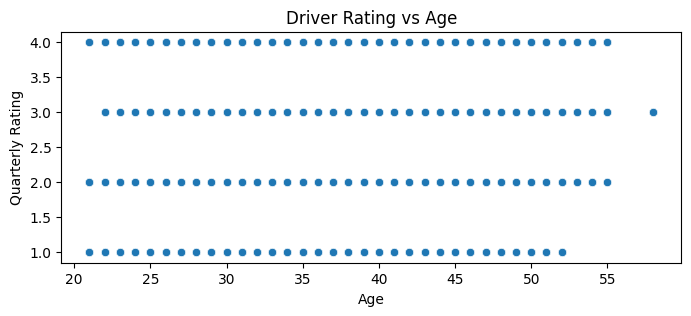

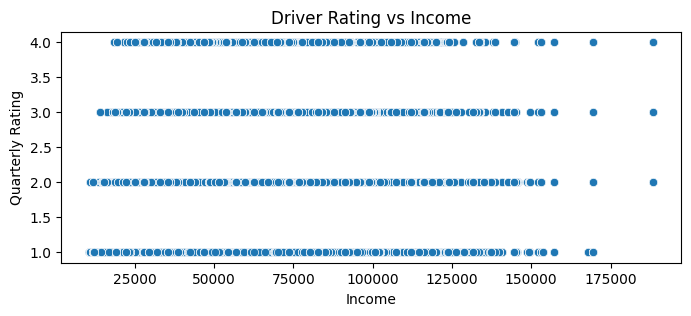

In [ ]:
# Scatter plot for Rating vs Age
plt.figure(figsize=(8,3))
sns.scatterplot(data=df, x='Age', y='Quarterly Rating')
plt.title('Driver Rating vs Age')
plt.show()

# Scatter plot for Rating vs Income
plt.figure(figsize=(8,3))
sns.scatterplot(data=df, x='Income', y='Quarterly Rating')
plt.title('Driver Rating vs Income')
plt.show()

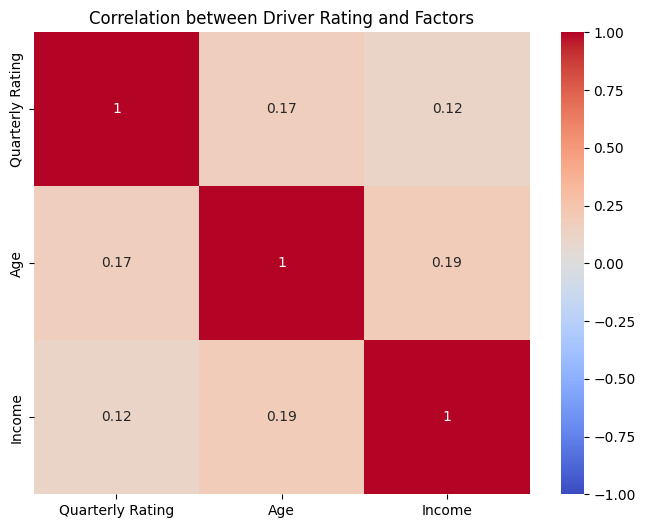

In [ ]:
# Calculate correlation matrix
corr_matrix = df[['Quarterly Rating', 'Age', 'Income']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Driver Rating and Factors')
plt.show()


Benefits of Driver Training:
 Offering training in customer service, conflict resolution, and communication could lead to better interactions between drivers and customers, enhancing satisfaction.

 Training drivers in the use of technology (navigation apps, payment systems) can lead to more efficient and reliable service, improving customer trust.

 Training drivers in time management and route optimization (using traffic data or ride-sharing apps efficiently) can improve the number of trips, thus increasing overall productivity and revenue.

 Providing training can be seen as an investment in the driver's career, increasing job satisfaction, better customer ratings and reducing turnover, which can decrease recruitment costs over time.


In [ ]:
# Prioritize Recruitment in Cities with Increasing Demand and Low Driver Supply
# Assuming you have a DataFrame `df` with columns: 'City', 'Churn' (binary 1 if churned), 'Quarterly_Rating'

# 1. Calculate churn rates by city
churn_by_city = df.groupby('City').agg({'Churn': 'mean'}).reset_index()

# 2. Calculate average ratings by city
ratings_by_city = df.groupby('City').agg({'Quarterly_Rating': 'mean'}).reset_index()

# 3. Merge churn rates and ratings
city_analysis = pd.merge(churn_by_city, ratings_by_city, on='City')

# 4. Flag cities for recruitment (high churn) and expansion (high ratings)
# You can set thresholds for 'high churn' and 'high ratings'
high_churn_threshold = 0.5  # Example: churn rate > 50%
high_rating_threshold = 4.0  # Example: average rating > 4.0

city_analysis['Recruitment_Flag'] = city_analysis['Churn'] > high_churn_threshold
city_analysis['Expansion_Flag'] = city_analysis['Quarterly_Rating'] > high_rating_threshold

# 5. Visualize Churn and Rating Analysis
plt.figure(figsize=(12,6))

# Plot churn rates by city
plt.subplot(1, 2, 1)
plt.bar(city_analysis['City'], city_analysis['Churn'], color='salmon')
plt.title('Churn Rates by City')
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

# Plot ratings by city
plt.subplot(1, 2, 2)
plt.bar(city_analysis['City'], city_analysis['Quarterly_Rating'], color='lightgreen')
plt.title('Average Quarterly Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Quarterly Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Output flagged cities
recruitment_cities = city_analysis[city_analysis['Recruitment_Flag'] == True]
expansion_cities = city_analysis[city_analysis['Expansion_Flag'] == True]

print("Cities flagged for recruitment (high churn):")
print(recruitment_cities[['City', 'Churn']])

print("\nCities flagged for expansion (high ratings):")
print(expansion_cities[['City', 'Quarterly_Rating']])


In [ ]:
#2.1 Drop any irrelevant column present in the dataset.
df = df.drop(columns=['Unnamed: 0'])
#Check the shape of the dataset after dropping the column.
df.shape

In [ ]:
df.drop(['LastWorkingDate', 'MMM-YY','Dateofjoining'], axis=1, inplace=True)  # Drop date columns if unnecessary

In [ ]:
numerical_cols=df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
datetime_cols = df.select_dtypes(include=['datetime']).columns

The frequency of having reviews, quarterly or bi-annually,should reflect the pace at which significant changes in the industry or business occur. If performance falls below somepre-defined thresholds, initiate a review.Regularly evaluate accuracy, precision, recall, and F1 score metrics against real-world data to identify any degradation in performance.
Use statistical tests or drift detection tools to crack model-drift which detects changes in the relationship between input data and target variable.
Regularly generate reports for stakeholders to review the model's effectiveness and the rationale behind changes.

A must important feedback is to conduct surveys to drivers to gather insights on their experiences, concerns, and feedback.
Sample survey questions might include:
“What factors influenced your decision to continue or stop driving for the company?”
“How satisfied are you with the support and resources provided by the company?”
“What improvements would you like to see?”
As per the customer side, they may not spend time over writing a good review but when they want to register complaints keep an eye for it.
Adapt your model to reflect new developments or changes in the transportation industry.

Before full-scale model updates, conduct pilot tests with small subsets of the data or in controlled environments to assess the impact of changes and gather additional feedback.
```
Implementation Example:
Quarterly Review Process:

Month 1: Collect and analyze performance metrics.
Month 2: Detect data and model drift; review survey feedback.
Month 3: Update the model as needed and test new features.
Month 4: Implement changes and document updates.
```

**Questionnaire:**

In [ ]:
# Step 1: Filter rows where Quarterly Rating is 5
drivers_with_rating_5 = df[df['Quarterly Rating'] == 5]
# Step 2: Find distinct Driver_IDs who have a rating of 5
distinct_drivers_with_rating_5 = drivers_with_rating_5['Driver_ID'].nunique()
# Step 3: Get total number of unique drivers
total_unique_drivers = df['Driver_ID'].nunique()
# Step 4: Calculate the percentage of drivers with a rating of 5
percentage_rating_5 = (distinct_drivers_with_rating_5 / total_unique_drivers) * 100
percentage_rating_5

0.0

 The percentage of drivers with a rating of 5 is 0%, as the unique values in the Quarterly Rating column are [2, 1, 4, 3], meaning there are no entries with a rating of 5.

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


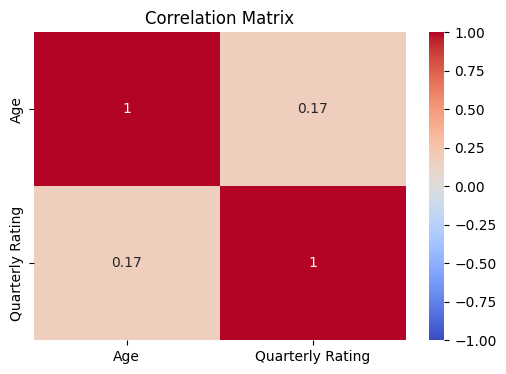

In [ ]:
# Name the city which showed the most improvement in Quarterly Rating over the past year based on Reporting date.
df['MMM-YY'] = df['MMM-YY'].dt.strftime('%b-%Y')
# Filter data for the year 2020
df_2020 = df[df['MMM-YY'].str.contains('2020')]

# Calculate the Quarterly Rating change for each driver
df_2020['Rating_Change'] = df_2020.groupby('Driver_ID')['Quarterly Rating'].transform(lambda x: x.iloc[-1] - x.iloc[0])

# Group by City and calculate the average change in Quarterly Rating
city_rating_change = df_2020.groupby('City')['Rating_Change'].mean()

# Find the city with the highest improvement
city_with_most_improvement = city_rating_change.idxmax()
max_improvement = city_rating_change.max()

print(f"The city that showed the most improvement in Quarterly Rating in 2020 is {city_with_most_improvement} with an average improvement of {max_improvement}.")


The city that showed the most improvement in Quarterly Rating in 2020 is C18 with an average improvement of 0.3166023166023166.


In [ ]:
# Name the city which showed the most improvement in Quarterly Rating over the past year based on LastWorkingDate
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%Y')
df['Quarterly Rating'] = df['Quarterly Rating'].astype(float)

# Filter data for 2019 and 2020
data_2019 = df[df['LastWorkingDate'].dt.year == 2019]
data_2020 = df[df['LastWorkingDate'].dt.year == 2020]

# Calculate average Quarterly Rating for each city in 2019 and 2020
avg_rating_2019 = data_2019.groupby('City')['Quarterly Rating'].mean()
avg_rating_2020 = data_2020.groupby('City')['Quarterly Rating'].mean()

# Merge the two series into a DataFrame
ratings_comparison = pd.DataFrame({
    'Average_2019': avg_rating_2019,
    'Average_2020': avg_rating_2020
})

# Calculate the improvement
ratings_comparison['Improvement'] = ratings_comparison['Average_2020'] - ratings_comparison['Average_2019']

# Identify the city with the maximum improvement
most_improved_city = ratings_comparison['Improvement'].idxmax()
most_improvement_value = ratings_comparison['Improvement'].max()

print(f"The city that showed the most improvement is {most_improved_city} with an improvement of {most_improvement_value:.2f} in Quarterly Rating.")


The city that showed the most improvement is C7 with an improvement of 0.48 in Quarterly Rating.


In [ ]:
#  Drivers with a Grade of ‘5’ are more likely to have a higher Total Business Value.(T/F)

df['Total Business Value'] = df['Total Business Value'].astype(float)

# Group by Grade and calculate the mean Total Business Value
grade_business_value = df.groupby('Grade')['Total Business Value'].mean()
print(grade_business_value)

Grade
1    3.564965e+05
2    4.665076e+05
3    5.964133e+05
4    1.243341e+06
5    1.413045e+06
Name: Total Business Value, dtype: float64


Grade 1 has the lowest average Total Business Value. Grade 5 has the highest average Total Business Value. So the statement stands valid.

In [ ]:
# If a driver's Quarterly Rating drops significantly, how does it impact their TotalBusinessValue in the subsequent period?
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
# Initializing and training the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_res, y_res)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       238

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



For Driver Retention, Recall is likely the most critical metric. Missing an at-risk driver (false negative) could mean that a driver leaves without intervention. Therefore, maximizing recall ensures us identify the highest number of churners and can take action to retain them.

In [ ]:
# Will the driver's performance be affected by the City they operate in? (Yes/No)
def perform_anova(df, column, group_by):
    unique_groups = df[group_by].unique()
    group_data = [df[df[group_by] == group][column] for group in unique_groups]
    f_stat, p_val = stats.f_oneway(*group_data)
    return f_stat, p_val

# ANOVA for Quarterly Rating
f_stat_rating, p_val_rating = perform_anova(df, 'Quarterly Rating', 'City')

# ANOVA for Total Business Value
f_stat_value, p_val_value = perform_anova(df, 'Total Business Value', 'City')

# Print the ANOVA results
print(f"ANOVA result for Quarterly Rating: F-statistic={f_stat_rating}, p-value={p_val_rating}")
print(f"ANOVA result for Total Business Value: F-statistic={f_stat_value}, p-value={p_val_value}")

# Interpretation of p-values
if p_val_rating < 0.05:
    print("The Quarterly Rating significantly varies across cities.")
else:
    print("The Quarterly Rating does not significantly vary across cities.")

if p_val_value < 0.05:
    print("The Total Business Value significantly varies across cities.")
else:
    print("The Total Business Value does not significantly vary across cities.")


In [ ]:
#Analyze any seasonality in the driver's ratings.
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
# Extract year, month, and quarter
df['Year'] = df['Dateofjoining'].dt.year
df['Month'] = df['Dateofjoining'].dt.month
df['Quarter'] = df['Dateofjoining'].dt.to_period('Q')

In [ ]:
# Aggregate ratings by month
monthly_ratings = df.groupby('Month')['Quarterly Rating'].mean().reset_index()

# Aggregate ratings by quarter
quarterly_ratings = df.groupby('Quarter')['Quarterly Rating'].mean().reset_index()

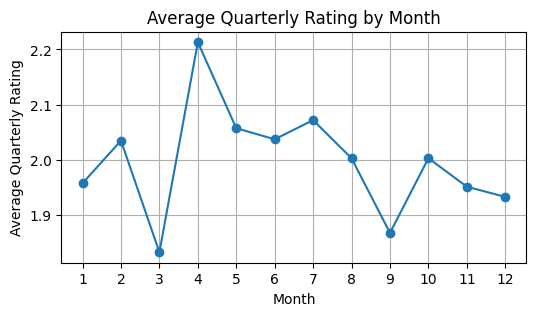

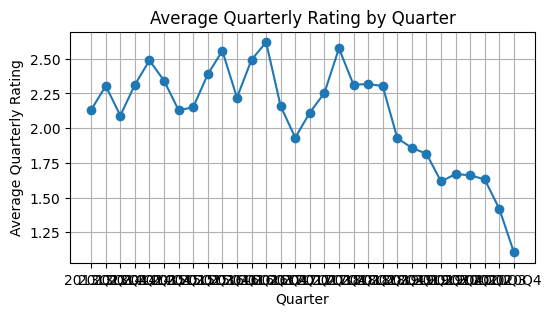

In [ ]:
import matplotlib.pyplot as plt

# Plot monthly ratings
plt.figure(figsize=(6, 3))
plt.plot(monthly_ratings['Month'], monthly_ratings['Quarterly Rating'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Quarterly Rating')
plt.title('Average Quarterly Rating by Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot quarterly ratings
plt.figure(figsize=(6, 3))
plt.plot(quarterly_ratings['Quarter'].astype(str), quarterly_ratings['Quarterly Rating'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Average Quarterly Rating')
plt.title('Average Quarterly Rating by Quarter')
plt.grid(True)
plt.show()


In [ ]:
# Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?
df['Ride Frequency'] = df.groupby('Driver_ID').size().reset_index(name='Ride Frequency')['Ride Frequency']
print(df['Ride Frequency'])
df['On-Time Rate'] = df['On-Time Arrivals'] / df['Total Rides']
df['Avg Ride Duration'] = df.groupby('Driver_ID')['Ride Duration'].mean()
df['Cancellation Rate'] = df['Cancelled Rides'] / df['Total Rides']
df['Avg Feedback Score'] = df.groupby('Driver_ID')['Feedback Score'].mean()

The above mentioned metrics could be considered while creating the dataset.  Being on time can have a strong influence on customer satisfaction, leading to higher ratings.
Frequent cancellations by a driver can negatively affect their rating.
Direct feedback from customers can provide insight into driving behavior and service quality, which may impact quarterly ratings.
Drivers who need to travel long distances between rides might be more fatigued, which could impact their rating.That needs to be addressed. Negative reviews or low ratings can create stress among the drivers.
We hereby try to understand Driver's Rating is beyond just the number of rides.